#<b>Assignment 4 - Machine Learning
##Matias Herter - 101272358

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#used for data visualization and exploratory data analysis
import seaborn as sns
#used to represent generic text, numbers or symbols so it can be used to extract texts that conform to that pattern
import re
#NLTK is a leading platform for building Python programs to work with human language data.
import nltk
#Help visualizind the number of words and how they are distributed inside the data
from wordcloud import WordCloud

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
#Pads the different text fiel to the same size - make them all the same lenght
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score


In [ ]:
fakeNews_Data = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/fake-real-news-dataset/main/data/Fake.csv')

In [ ]:
fakeNews_Data.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017

#Learning about our data

In [ ]:
fakeNews_Data['date'].value_counts()

May 10, 2017         46
May 26, 2016         44
May 6, 2016          44
May 5, 2016          44
May 11, 2016         43
                     ..
December 9, 2017      1
December 4, 2017      1
November 19, 2017     1
November 20, 2017     1
Jul 19, 2015          1
Name: date, Length: 1681, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


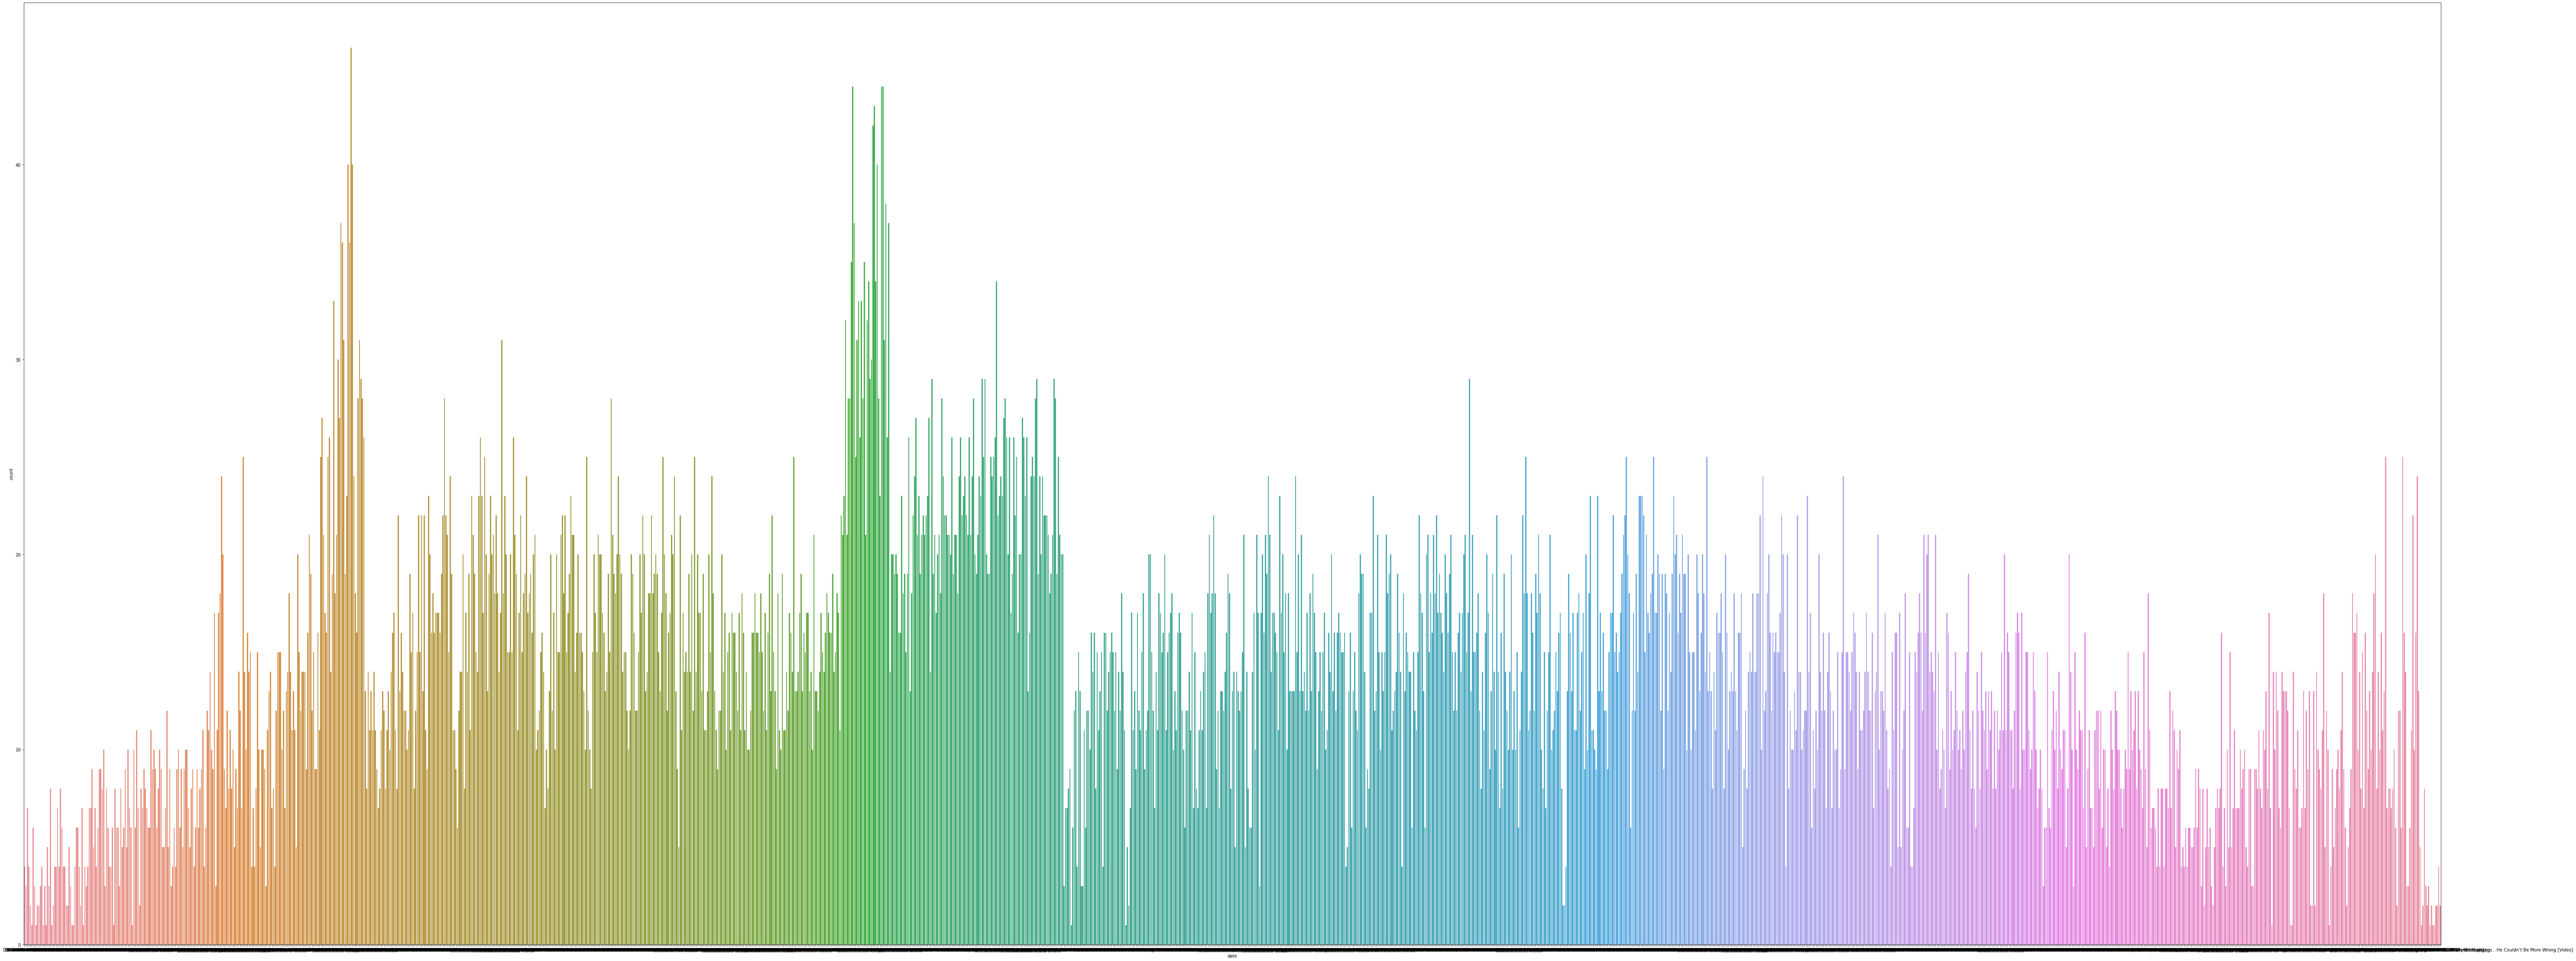

In [ ]:
plt.figure(figsize=(100,40))
sns.countplot('date',data=fakeNews_Data)

In [ ]:
fakeNews_Data['subject'].value_counts()
#Has 23,4681 data entries!

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


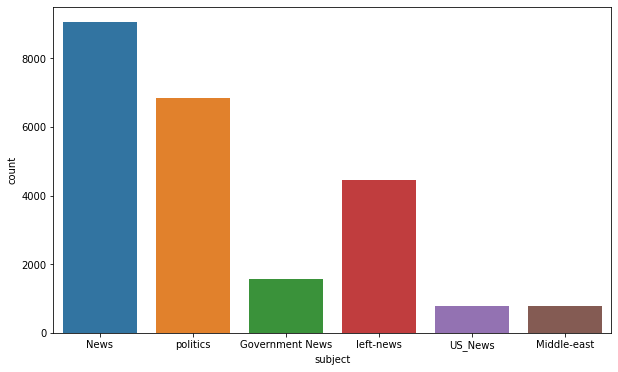

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot('subject',data=fakeNews_Data)

In [ ]:
#Converting all the text data into a list. Each entry was "compressed" into one row
fakeNews_Data['text'].tolist()

['Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t e

In [ ]:
#Joining all the spaces in the data so that we can use wordcloud later on
joinedFake_Data = ' '.join(fakeNews_Data['text'].tolist())

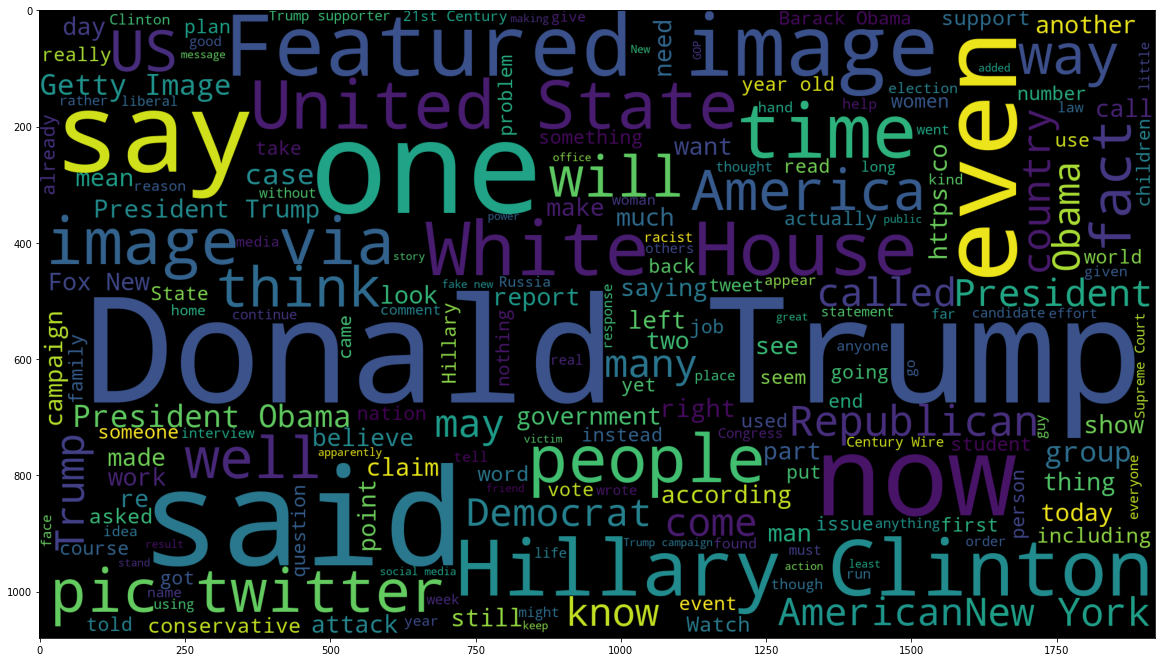

In [ ]:
wordCloud = WordCloud(width=1920, height=1080).generate(joinedFake_Data)
fig=plt.figure(figsize=(20,20))
plt.imshow(wordCloud)

##Now we will plot the Data set with they accurate news


In [ ]:
realNews_Data = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/fake-real-news-dataset/main/data/True.csv')

In [ ]:
realNews_Data.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017

In [ ]:
realNews_Data['date'].value_counts()

December 20, 2017      182
December 6, 2017       166
November 30, 2017      162
November 9, 2017       158
October 13, 2017       155
                      ... 
August 6, 2016           1
August 21, 2016          1
September 3, 2016        1
September 11, 2016       1
January 24, 2016         1
Name: date, Length: 716, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


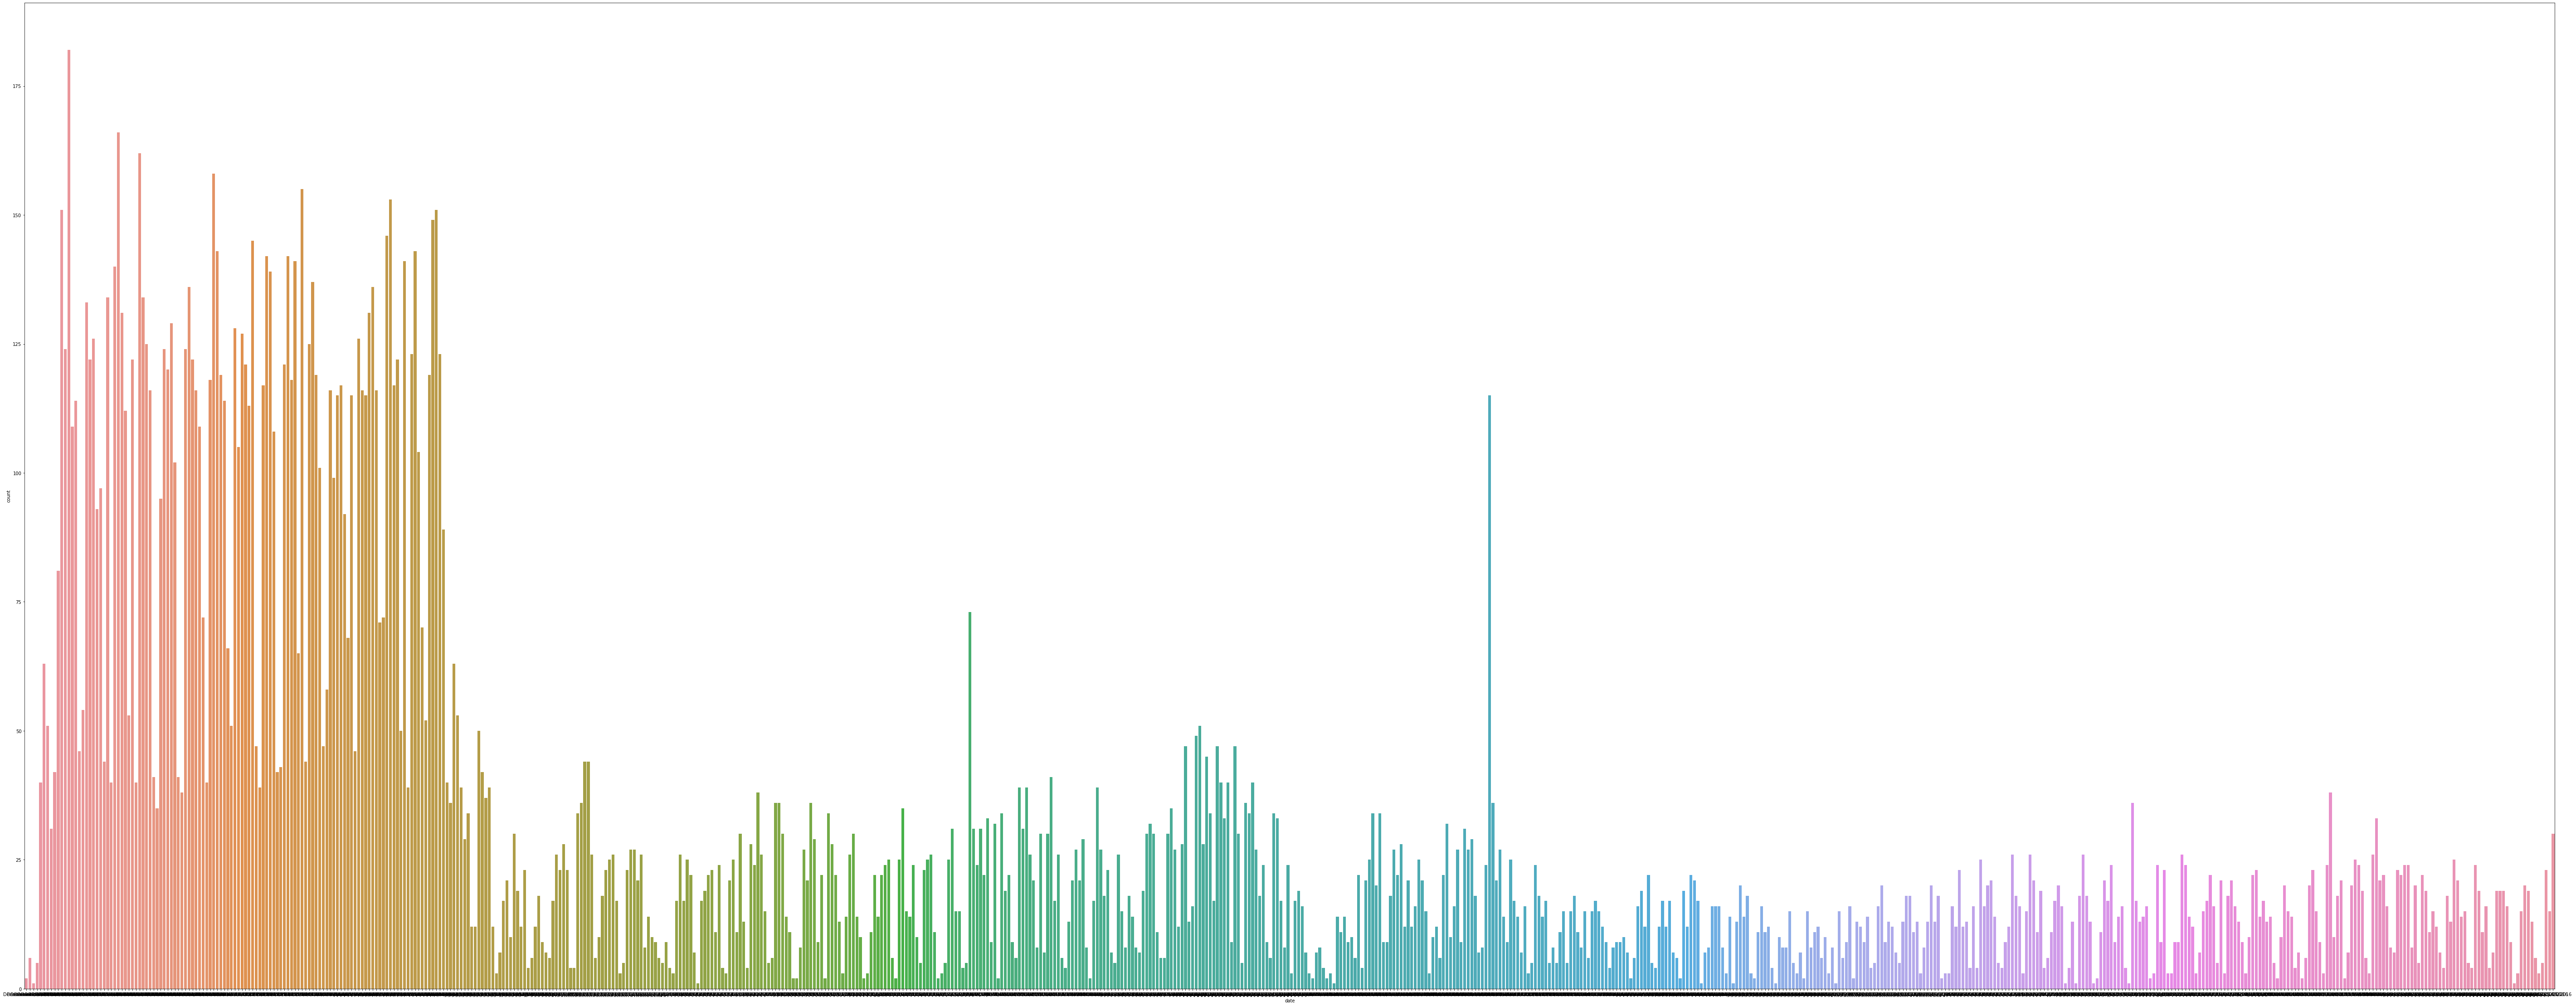

In [ ]:
plt.figure(figsize=(100,40))
sns.countplot('date',data=realNews_Data)

In [ ]:
#There are 21417 data entries to this data set!
realNews_Data['subject'].value_counts()

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


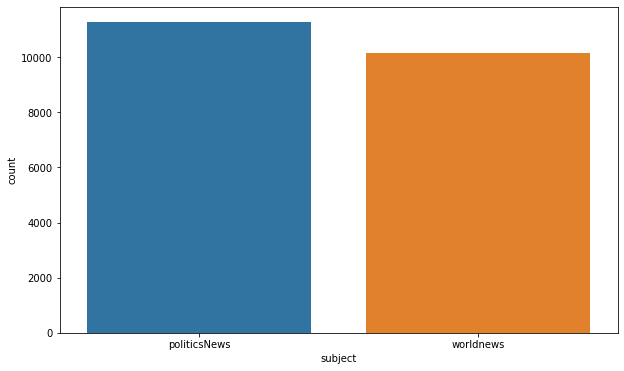

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot('subject',data=realNews_Data)

In [ ]:
realNews_Data['text'].tolist()

['WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary” spending on programs that support educa

In [ ]:
joinedReal_Data = ' '.join(realNews_Data['text'].tolist())

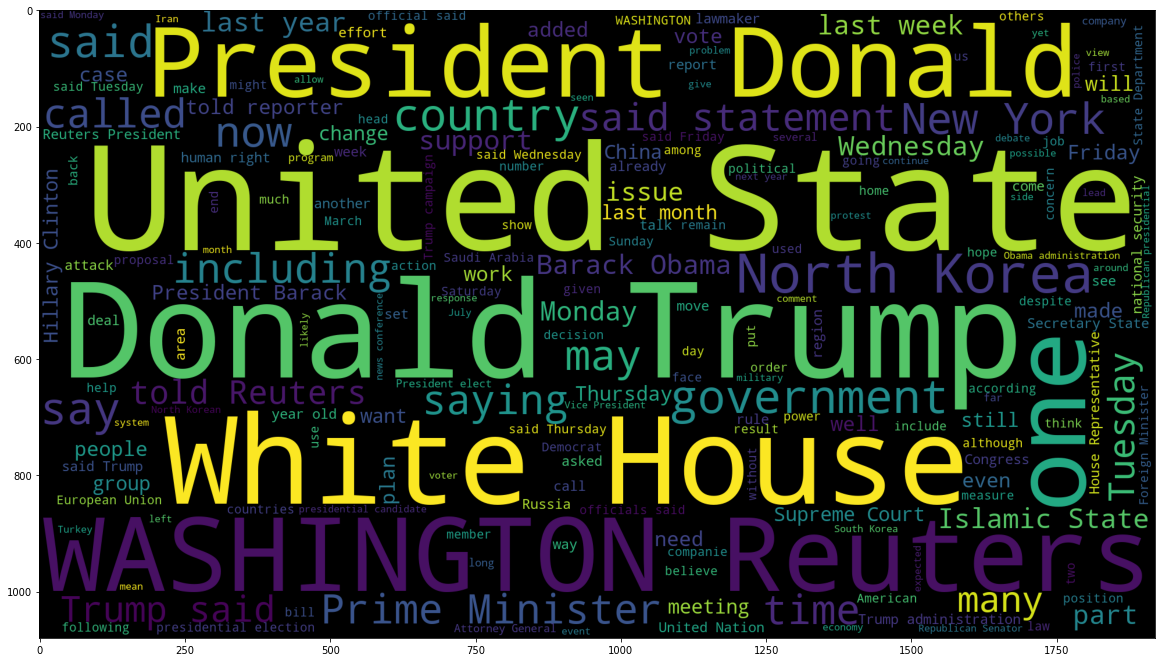

In [ ]:
wordCloud = WordCloud(width=1920, height=1080).generate(joinedReal_Data)
fig=plt.figure(figsize=(20,20))
plt.imshow(wordCloud)

In [ ]:
#CHECK MIN 25 VIDEO
unknown_publishers = []
for index, row in enumerate(realNews_Data.text.values):
  try:
    record = row.split('-', maxsplit=1)
    record[1]
    assert(len(record[0])<120)

  except:
    unknown_publishers.append(index)



In [ ]:
len(unknown_publishers)

222

In [ ]:
realNews_Data.iloc[unknown_publishers]

title  \
7      Factbox: Trump on Twitter (Dec 29) - Approval ...   
8             Trump on Twitter (Dec 28) - Global Warming   
12     Factbox: Trump on Twitter (Dec 28) - Vanity Fa...   
13        Trump on Twitter (Dec 27) - Trump, Iraq, Syria   
14     Man says he delivered manure to Mnuchin to pro...   
...                                                  ...   
20135  China's big money trumps U.S. influence in Cam...   
20500  UK publisher rejected request to block academi...   
20667  Rohingya say their village is lost to Myanmar'...   
21246  'Gates of Hell': Iraqi army says fighting near...   
21339  Indian court's privacy ruling is blow to gover...   

                                                    text       subject  \
7      The following statements were posted to the ve...  politicsNews   
8      The following statements were posted to the ve...  politicsNews   
12     The following statements were posted to the ve...  politicsNews   
13     The following statements were posted to the ve...  politicsNews   
14      (In Dec. 25 story, in second paragraph, corre...  politicsNews   
...                                                  ...           ...   
20135   (Story corrects to million from billion in pa...     worldnews   
20500   (This Sept 8 story corrects headline, clarifi...     worldnews   
20667   (Story refiles to add dropped word  not , in ...     worldnews   
21246   (Story corrects third paragraph to show Mosul...     worldnews   
21339   (Story corrects to fix spelling in paragraph ...     worldnews   

                      date  
7       December 29, 2017   
8       December 29, 2017   
12      December 28, 2017   
13      December 28, 2017   
14      December 25, 2017   
...                    ...  
20135  September 11, 2017   
20500   September 8, 2017   
20667   September 7, 2017   
21246     August 29, 2017   
21339     August 24, 2017   

[222 rows x 4 columns]

In [ ]:
realNews_Data = realNews_Data.drop(8970, axis=0)

In [ ]:
publisher = []
temporary_text = []

for index, row in enumerate(realNews_Data.text.values):
  if index in unknown_publishers:
    temporary_text.append(row)
    publisher.append('Unknown')

  else:
    record = row.split('-', maxsplit=1)
    publisher.append(record[0].strip())
    temporary_text.append(record[1].strip())

In [ ]:
realNews_Data['publisher'] = publisher
realNews_Data['text'] = temporary_text

In [ ]:
realNews_Data.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  The head of a conservative Republican faction ...  politicsNews   
1  Transgender people will be allowed for the fir...  politicsNews   
2  The special counsel investigation of links bet...  politicsNews   
3  Trump campaign adviser George Papadopoulos tol...  politicsNews   
4  President Donald Trump called on the U.S. Post...  politicsNews   

                 date                     publisher  
0  December 31, 2017           WASHINGTON (Reuters)  
1  December 29, 2017           WASHINGTON (Reuters)  
2  December 31, 2017           WASHINGTON (Reuters)  
3  December 30, 2017           WASHINGTON (Reuters)  
4  December 29, 2017   SEATTLE/WASHINGTON (Reuters)

In [ ]:
realNews_Data.shape

(21416, 5)

In [ ]:
empty_fake_index = [index for index,text in enumerate(fakeNews_Data.text.tolist()) if str(text).strip()==""]

In [ ]:
fakeNews_Data.iloc[empty_fake_index]

title text    subject  \
10923  TAKE OUR POLL: Who Do You Think President Trum...        politics   
11041  Joe Scarborough BERATES Mika Brzezinski Over “...        politics   
11190  WATCH TUCKER CARLSON Scorch Sanctuary City May...        politics   
11225  MAYOR OF SANCTUARY CITY: Trump Trying To Make ...        politics   
11236  SHOCKER: Public School Turns Computer Lab Into...        politics   
...                                                  ...  ...        ...   
21816  BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...       left-news   
21826  FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...       left-news   
21827  (VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...       left-news   
21857  (VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...       left-news   
21873  (VIDEO) HYSTERICAL SNL TAKE ON HILLARY’S ANNOU...       left-news   

               date  
10923  May 10, 2017  
11041  Apr 26, 2017  
11190   Apr 6, 2017  
11225   Apr 2, 2017  
11236   Apr 1, 2017  
...             ...  
21816  Apr 27, 2015  
21826  Apr 25, 2015  
21827  Apr 25, 2015  
21857  Apr 14, 2015  
21873  Apr 12, 2015  

[630 rows x 4 columns]

In [ ]:
realNews_Data['text'] = realNews_Data['title'] + " " + realNews_Data['text']
fakeNews_Data['text'] = fakeNews_Data['title'] + " " + fakeNews_Data['text']

In [ ]:
realNews_Data['text'] = realNews_Data['text'].apply(lambda x: str(x).lower())
fakeNews_Data['text'] = fakeNews_Data['text'].apply(lambda x: str(x).lower())

In [ ]:
realNews_Data['class'] = 1
fakeNews_Data['class'] = 0

In [ ]:
realNews_Data.columns

Index(['title', 'text', 'subject', 'date', 'publisher', 'class'], dtype='object')

In [ ]:
realNews_Data = realNews_Data[['text','class']]

In [ ]:
fakeNews_Data = fakeNews_Data[['text', 'class']]

In [ ]:
realNews_Data.head()

text  class
0  as u.s. budget fight looms, republicans flip t...      1
1  u.s. military to accept transgender recruits o...      1
2  senior u.s. republican senator: 'let mr. muell...      1
3  fbi russia probe helped by australian diplomat...      1
4  trump wants postal service to charge 'much mor...      1

In [ ]:
fakeNews_Data.head()

text  class
0   donald trump sends out embarrassing new year’...      0
1   drunk bragging trump staffer started russian ...      0
2   sheriff david clarke becomes an internet joke...      0
3   trump is so obsessed he even has obama’s name...      0
4   pope francis just called out donald trump dur...      0

In [ ]:
dataSet = realNews_Data.append(fakeNews_Data, ignore_index=True)

In [ ]:
dataSet.sample(10)

text  class
27612   how john oliver and a cat created an internat...      0
7779   congressional republicans want to talk tehran,...      1
14244  zimbabwe civil society calls for post-mugabe '...      1
23830   angry constituents shame republican by turnin...      0
43522  bilderberg to meet next week in chantilly, vir...      0
6619   congress should consider help for puerto rico'...      1
19932  italy's 5-star launches vote for leader, di ma...      1
21288  majority of people in france now dissatisfied ...      1
4116   trump warns democrats obamacare will die witho...      1
29935   busted: declassified memo shows rumsfeld’s li...      0

In [ ]:
!pip install spacy==2.2.3
!python -m spacy download en_core_web_sm
!pip install beautifulsoup4==4.9.1
!pip install textblob==0.15.3
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

     |████████████████████████████████| 10.4 MB 4.8 MB/s 
     |████████████████████████████████| 2.2 MB 33.7 MB/s 
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Attempting uninstall: spacy
    Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4
     |████████████████████████████████| 12.0 MB 5.4 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
     |████████████████████████████████| 115 kB 5.1 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-gw7hkwht
  Running command git clone -q https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip

In [ ]:
#Import to use function that removes special characters from dataSet
import preprocess_kgptalkie as ps

In [ ]:
dataSet['text'].apply(lambda x: ps.remove_special_chars(x))

0        as us budget fight looms republicans flip thei...
1        us military to accept transgender recruits on ...
2        senior us republican senator let mr mueller do...
3        fbi russia probe helped by australian diplomat...
4        trump wants postal service to charge much more...
                               ...                        
44892    mcpain john mccain furious that iran treated u...
44893    justice yahoo settles email privacy classactio...
44894    sunnistan us and allied safe zone plan to take...
44895    how to blow 700 million al jazeera america fin...
44896    10 us navy sailors held by iranian military si...
Name: text, Length: 44897, dtype: object

In [ ]:
#Uses a neural network model to learn word associations from a large corpus of text. Once trained, such a model can detect synonymous words or suggest additional words for a partial sentence. 
#Word2vec represents each distinct word with a particular list of numbers called a vector. 
#The vectors are chosen carefully such that a simple mathematical function indicates the level of semantic similarity between the words represented by those vectors
import gensim

In [ ]:
y = dataSet['class'].values

In [ ]:
x = [data.split() for data in dataSet['text'].tolist()]

In [ ]:
vectorDimension = 100
w2v_model = gensim.models.Word2Vec(sentences = x, size = vectorDimension, window = 10, min_count = 1)

In [ ]:
len(w2v_model.wv.vocab)

375373

In [ ]:
w2v_model.wv.most_similar('brazil')

[('argentina', 0.6420403718948364),
 ('peru', 0.6346250176429749),
 ('microcephaly', 0.6239522695541382),
 ('graft', 0.6008166074752808),
 ('brazilian', 0.5952999591827393),
 ('temer', 0.5814788341522217),
 ("brazil's", 0.5716911554336548),
 ('thailand', 0.570044994354248),
 ('cdc', 0.5607839226722717),
 ('tanzania', 0.5548175573348999)]

In [ ]:
w2v_model.wv.most_similar('america')

[('america,', 0.7551337480545044),
 ('america.', 0.7189735174179077),
 ('nation', 0.7097984552383423),
 ('world', 0.6389868855476379),
 ('country', 0.6310431361198425),
 ('america’s', 0.6231319904327393),
 ('us', 0.5783215761184692),
 ('capitalism', 0.565697431564331),
 ('europe', 0.5643987655639648),
 ('american', 0.5555145144462585)]

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x)

In [ ]:
x = tokenizer.texts_to_sequences(x)

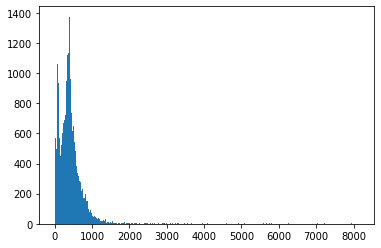

In [ ]:
plt.hist([len(X) for X in x],bins = 700)
plt.show()

In [ ]:
#Check how many items have more than a thousand words.
numberofWords = np.array([len(X) for X in x])
len(numberofWords[numberofWords>1000])

1603

In [ ]:
#truncate the lines with more than a thousand word to a max of a thousand
maxLen= 1000
x = pad_sequences(x,maxlen=maxLen)

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
vocab = tokenizer.word_index

In [ ]:
def get_weight_matrix(model):
  weight_matrix = np.zeros((vocab_size, vectorDimension))

  for word, i in vocab.items():
    weight_matrix[i] = model.wv[word]

  return weight_matrix

In [ ]:
embedding_vectors = get_weight_matrix(w2v_model)

In [ ]:
embedding_vectors.shape

(375374, 100)

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, output_dim = vectorDimension, weights = [embedding_vectors], input_length= maxLen, trainable = False ))
model.add(LSTM(units=128))
#Only 2 classes so we can use sigmoid
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 100)         37537400  
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 37,654,777
Trainable params: 117,377
Non-trainable params: 37,537,400
_________________________________________________________________


In [ ]:
#Split data into train and test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,y)

In [ ]:
model.fit(X_train, y_train, validation_split=0.3, epochs=10)

Epoch 1/10
737/737 [==============================] - 127s 164ms/step - loss: 0.1355 - acc: 0.9496 - val_loss: 0.0842 - val_acc: 0.9730
Epoch 2/10
737/737 [==============================] - 119s 162ms/step - loss: 0.0617 - acc: 0.9789 - val_loss: 0.0474 - val_acc: 0.9849
Epoch 3/10
737/737 [==============================] - 119s 162ms/step - loss: 0.0481 - acc: 0.9842 - val_loss: 0.0350 - val_acc: 0.9897
Epoch 4/10
737/737 [==============================] - 120s 162ms/step - loss: 0.0283 - acc: 0.9908 - val_loss: 0.0294 - val_acc: 0.9906
Epoch 5/10
737/737 [==============================] - 120s 163ms/step - loss: 0.0154 - acc: 0.9948 - val_loss: 0.0241 - val_acc: 0.9929
Epoch 6/10
737/737 [==============================] - 120s 162ms/step - loss: 0.0075 - acc: 0.9977 - val_loss: 0.0214 - val_acc: 0.9946
Epoch 7/10
737/737 [==============================] - 119s 162ms/step - loss: 0.0038 - acc: 0.9989 - val_loss: 0.0223 - val_acc: 0.9948
Epoch 8/10
737/737 [============================

In [ ]:
y_predict = (model.predict(X_test) >= 0.5).astype(int)

In [ ]:
accuracy_score(y_test, y_predict)

0.9939420935412027

In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5839
           1       0.99      0.99      0.99      5386

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



In [ ]:
inputNews = ['Bananas are normaly purple and love politicians']

In [ ]:
inputNews = tokenizer.texts_to_sequences(inputNews)

In [ ]:
pad_sequences(inputNews, maxlen=maxLen)

array([[    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
      

In [ ]:
inputNews = pad_sequences(inputNews, maxlen=maxLen)

In [ ]:
(model.predict(inputNews) >= 0.5).astype(int)

array([[0]])

In [ ]:
TESTE = ['Former U.S. President Donald Trump on Saturday said he is endorsing celebrity surgeon Dr. Mehmet Oz, who is running as a Republican for U.S. Senate in Pennsylvania']


In [ ]:
TESTE = tokenizer.texts_to_sequences(TESTE)

In [ ]:
TESTE=pad_sequences(TESTE, maxlen=maxLen)

In [ ]:
(model.predict(TESTE) >= 0.5).astype(int)

array([[0]])